# Introdução

Você recebeu uma oferta de estágio no departamento analítico da Y.Afisha. Sua primeira tarefa é ajudar a empresa a otimizar suas despesas com marketing, analisando:
- Como as pessoas usam o produto
- Quando elas começam a comprar
- Quanto dinheiro cada cliente traz para a empresa
- Quando as despesas serão cobertas

## Inicialização

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Carregar dados

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

## Explore os dados iniciais

### Visits

A tabela visits (os logs do servidor com dados sobre os acessos ao site):
- Uid — identificador unívoco do usuário
- Device — dispositivo do usuário
- Start Ts — data e hora do início da sessão
- End Ts — data e hora do final da sessão
- Source Id — identificador da origem do anúncio através do qual o usuário chegou

In [3]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.duplicated().sum()

0

Possui 359400 linhas e 5 colunas
- Não há valores ausentes
- Não há valores duplicados

- Os tipos de dados das colunas 'End Ts' e 'Start Ts' deveriam ser do tipo datetime.
- A coluna 'Device' pode ser do tipo 'category', para otimizar o tamanho dos dados.
- O nome das colunas deveriam estar em letras minúsculas.

#### Corrigindo os dados

In [6]:
visits = visits.rename(columns={'Device': 'device',
           'End Ts': 'end_ts',
           'Source Id': 'source_id',
           'Start Ts': 'start_ts',
           'Uid': 'uid'
          })

In [7]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [8]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [9]:
visits['device'] = visits['device'].astype('category')

In [10]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Os tipos dos dados e os nomes das colunas foram corrigidos. 
O tamanho dos dados caiu de 79.3 MB para 11.3 MB.

### Orders

A tabela orders (dados sobre os pedidos):
- Uid — identificador unívoco do usuário que faz um pedido
- Buy Ts — data e hora do pedido
- Revenue — a receita da Y.Afisha com o pedido

In [11]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [12]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
orders.duplicated().sum()

0

Possui 50415 linhas e 3 colunas
- Não há valores ausentes
- Não há valores duplicados
- Os tipos de dados das colunas 'Buy Ts' deveria ser do tipo datetime.
- O nome das colunas deveriam estar em letras minúsculas.

#### Corrigindo os dados

In [14]:
orders = orders.rename(columns={'Buy Ts': 'buy_ts',
           'Revenue': 'revenue',
           'Uid': 'uid'
          })

In [15]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [16]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Os tipos de dados e o nome das colunas foi corrigido.

### Costs

A tabela costs (dados sobre as despesas com marketing):
- source_id — identificador da origem de anúncio
- dt — data
- costs — despesas com esta origem de anúncio neste dia

In [17]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [18]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [19]:
costs.duplicated().sum()

0

Possui 2542 linhas e 3 colunas
- Não há valores ausentes
- Não há valores duplicados
- Os tipos de dados das colunas 'dt' deveria ser do tipo datetime.


#### Corrigindo os dados

In [20]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


O tipo de dados foi corrigido.

## Análise dos dados

### Produto

- Quantas pessoas usam-no cada dia, semana e mês?

In [22]:
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year
visits['date'] = visits['start_ts'].dt.date

dau_total = visits.groupby('date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = (visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean())
print(int(dau_total))
print(int(wau_total))
print(int(mau_total))


907
5716
23228


A média de pessoas que usam o produto por dia são 907 pessoas; por semana são 5716 pessoas e por mês são 23228 pessoas.

- Quantas sessões ocorrem por dia?

In [23]:
sessions_per_day = visits.groupby('date').agg(
    {'uid': ['count', 'nunique']}
)
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sess_per_day'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
print(sessions_per_day['sess_per_day'].mean())

1.082169644003972


Em média, os usuários não realizam mais do que 1 sessão por dia. Realizam a sessão para ver algum pedido mas raramente voltam.

- Que comprimento tem cada sessão?

In [24]:
session_duration = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(session_duration.mean())

643.506488592098


As sessões duram em média 643,5 segundos, equivalente a aproximadamente 11 minutos.

- Com que frequência os usuários voltam?

In [25]:
#taxa de retenção - com que frequência os usuários retornam 
retention_rate_wau = dau_total / wau_total * 100
retention_rate_mau = dau_total / mau_total * 100
print(retention_rate_wau)
print(retention_rate_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


A taxa de retenção de 30 dias se estabiliza em cerca de 6%. Em termos gerais, qualquer porcentagem acima disso pode ser considerada uma boa taxa de retenção. A taxa semanal se estabiliza em 12%.

A taxa por semana é aproximadamente 16% e por mês aproximadamente 4%. Portanto a taxa de retenção semanal está boa, a mensal está um pouco abaixo da média.

### Vendas
- Quando as pessoas começam a comprar?

In [26]:
orders['month'] = orders['buy_ts'].dt.month
orders['year'] = orders['buy_ts'].dt.year

In [27]:
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit'
orders = orders.join(first_visit, on='uid')

In [28]:
first_order = orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'
orders = orders.join(first_order, on='uid')

In [29]:
orders['to_be_client'] = (orders['first_order'] - orders['first_visit']).dt.days

In [30]:
print(orders.groupby(['year', 'month'])['to_be_client'].mean())


year  month
2017  6         0.715378
      7         3.245451
      8         5.204759
      9         8.759079
      10        9.000528
      11       13.969959
      12       15.687681
2018  1        19.180470
      2        22.050559
      3        28.412692
      4        28.801711
      5        34.394386
      6         0.000000
Name: to_be_client, dtype: float64


O tempo entre o registro e a conversão dos usuários só aumentou a cada coorte que se passava (mês a mês), iniciando com os usuários virando clientes no mesmo dia (06/2017), até demorando mais de 1 mês para realizar sua primeira compra (06/2018).

- Quantos pedidos os clientes fazem durante um determinado período de tempo? (mês)

In [31]:
order_per_month = orders.groupby(['year', 'month', 'uid'])['buy_ts'].count().sort_values(ascending=False)
print(order_per_month)

year  month  uid                 
2018  5      6166747268563050393     67
2017  8      13888745432979765063    51
      12     5539673724080479777     49
2018  4      6166747268563050393     45
      2      10343016064897450067    42
                                     ..
2017  11     6592293668359143765      1
             6600959226619162783      1
             6608833332313155355      1
             6610742752017665669      1
2018  6      83872787173869366        1
Name: buy_ts, Length: 41019, dtype: int64


In [32]:
order_per_month.value_counts()

1     36303
2      3511
3       629
4       190
5        92
6        48
7        35
8        30
11       24
9        23
10       16
13       12
12       12
14       11
17       11
18        8
23        7
27        5
22        4
25        4
28        4
29        4
20        4
16        4
35        3
19        3
21        2
30        2
31        2
42        2
49        1
15        1
51        1
45        1
40        1
39        1
24        1
37        1
26        1
36        1
67        1
34        1
33        1
32        1
Name: buy_ts, dtype: int64

In [33]:
order_per_month.mean()

1.2290645798288597

A grande maioria dos usuários não fazem mais do que uma compra por mês. Aparentemente não há um padrão para aquele que fazem mais compras por mês.

- Qual é o volume médio de uma compra? (valor médio gasto pelos clientes)

In [34]:
orders['revenue'].mean()

4.999646930477041

O valor médio gasto aproximadamente pelos clientes em uma compra: 5.00

Média por mês:

In [35]:
orders.groupby(['year', 'month'])['revenue'].mean()

year  month
2017  6        4.060106
      7        5.306589
      8        4.847139
      9        5.416448
      10       4.928280
      11       4.783518
      12       5.852139
2018  1        4.112927
      2        4.840095
      3        5.413930
      4        5.150645
      5        4.771279
      6        3.420000
Name: revenue, dtype: float64

As médias por mês são valores aproximados, não havendo valores atípicos.

- Quanto dinheiro eles trazem para a empresa (LTV)?

In [36]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns= ['uid', 'first_order_month']
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month', 'n_buyers'] #novos clientes em cada mês

In [37]:
margin_rate = 0.5
orders_ = pd.merge(orders, first_orders, on='uid')
cohorts = (
    orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


<AxesSubplot:title={'center':'LTV'}, xlabel='age', ylabel='first_order_month'>

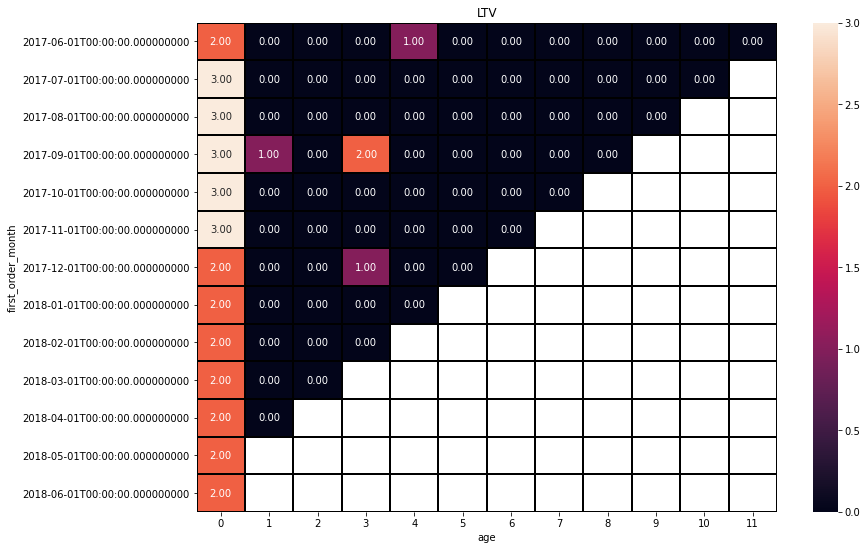

In [38]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output,
          annot=True,
          fmt='.2f',
          linewidths=1,
          linecolor='black')

A coorte que mais deu receita foi a quarta coorte, com a soma de 6.0

In [39]:
report['ltv'].mean()

0.5748197460119029

Considerando a margem de lucro de 50%, o LTV (receita média que um cliente irá gerar ao longo de sua vida como cliente) é de aproximadamente 0.57

In [40]:
orders['first_order_month'] = orders[
    'first_order'
].astype('datetime64[M]')
cohort_stats = orders.groupby('first_order_month')['revenue'].sum()
print(cohort_stats)

first_order_month
2017-06-01    24031.69
2017-07-01    16127.92
2017-08-01    11606.26
2017-09-01    34676.32
2017-10-01    27603.45
2017-11-01    26098.99
2017-12-01    33485.74
2018-01-01    16663.13
2018-02-01    16750.50
2018-03-01    19273.41
2018-04-01    11810.61
2018-05-01    13925.76
2018-06-01        3.42
Name: revenue, dtype: float64


Na teoria, quanto mais tempo o usuário é consumidor, mais ele gasta no total, e não é o que vemos aqui. As coortes que fizeram a primeira compra no mês de 09/2017 a 12/2017 foram as que mais trouxeram receita, talvez por alguma condição especial de fim de ano.

### Marketing
- Quanto dinheiro foi gasto no total? 

In [41]:
costs['costs'].sum()

329131.62

No total foi gasto 329131.62

- Quanto dinheiro foi gasto por origem?

In [42]:
cost_per_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(cost_per_source)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


<AxesSubplot:title={'center':'custo por origem'}, xlabel='source_id'>

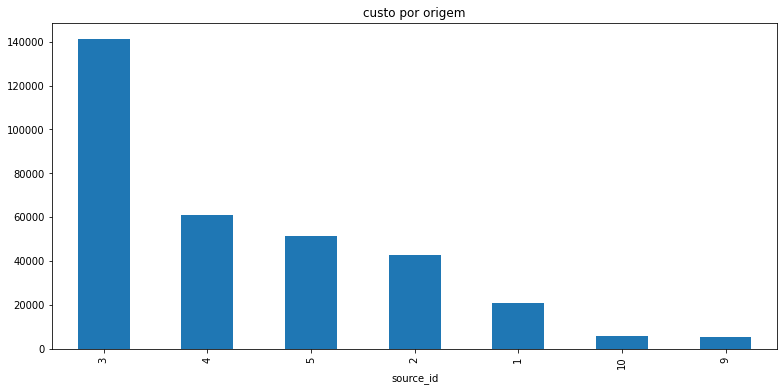

In [65]:
plt.title('custo por origem')
cost_per_source.plot(kind='bar', figsize=(13, 6))

A origem que mais gastou foi a do id 3, sendo mais que o dobro da segunda colocada.

- Quanto dinheiro foi gasto ao longo do tempo? (mês a mês)

In [44]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

In [45]:
costs_per_month = costs.groupby('dt_month')['costs'].sum()

In [46]:
print(costs_per_month)

dt_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64


<AxesSubplot:title={'center':'custo por mês'}, xlabel='dt_month'>

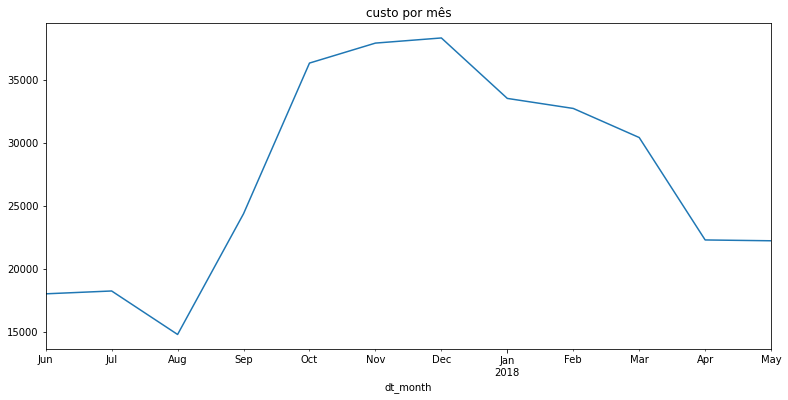

In [64]:
plt.title('custo por mês')
costs_per_month.plot.line('dt_month', 'costs', figsize=(13, 6))

Ao longo de 2017, o gasto só aumentou, e em 2018 o gasto só diminuiu.

- Quanto custou a aquisição de clientes para cada origem? (CAC)

In [48]:
monthly_costs = costs.groupby('dt_month').sum()
report_ = pd.merge(
    report, monthly_costs, left_on='first_order_month', right_on='dt_month'
)
report_['cac'] = report_['costs'] / report_['n_buyers']

In [49]:
print(report_.head())

  first_order_month  n_buyers order_month  revenue        gp  age       ltv  \
0        2017-06-01      2023  2017-06-01  9557.49  4778.745    0  2.362207   
1        2017-06-01      2023  2017-07-01   981.82   490.910    1  0.242664   
2        2017-06-01      2023  2017-08-01   885.34   442.670    2  0.218819   
3        2017-06-01      2023  2017-09-01  1931.30   965.650    3  0.477336   
4        2017-06-01      2023  2017-10-01  2068.58  1034.290    4  0.511265   

   source_id    costs       cac  
0       1020  18015.0  8.905091  
1       1020  18015.0  8.905091  
2       1020  18015.0  8.905091  
3       1020  18015.0  8.905091  
4       1020  18015.0  8.905091  


In [50]:
costs_ = costs[['dt_month', 'source_id']]
report_ = report_.drop(columns=['source_id'])
report_ = pd.merge(
    report_, costs_, left_on='order_month', right_on='dt_month'
)

In [51]:
cac_per_source = report_.groupby('source_id')['cac'].sum().sort_values(ascending=False)
print(cac_per_source)

source_id
5     21975.265102
1     21882.727881
2     21882.727881
3     21882.727881
4     21882.727881
9     21882.727881
10    21882.727881
Name: cac, dtype: float64


<AxesSubplot:title={'center':'custo de aquisição de clientes por origem'}, xlabel='source_id'>

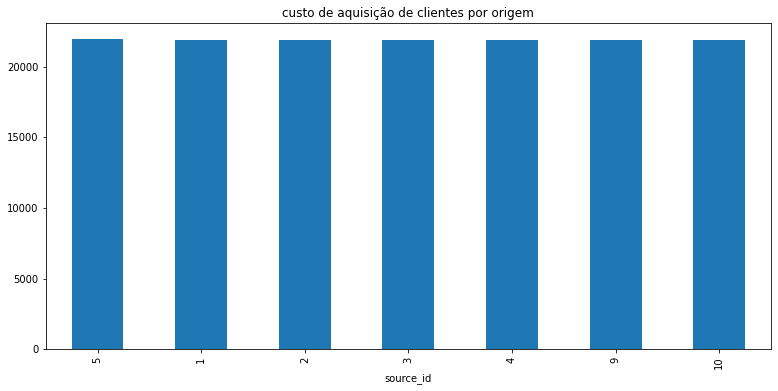

In [67]:
plt.title('custo de aquisição de clientes por origem')
cac_per_source.plot(kind='bar', figsize=(13, 6))

O custo para atrair o cliente do id de origem 5 foi 
o maior; no restante dos ids investiram o mesmo valor. 

Para saber qual origem compensa mais investir, devemos ver qual origem vende mais e quais tem mais visitas e pedidos:

In [53]:
visits_ = visits[['uid', 'source_id']]
orders_source = pd.merge(orders, visits_, on='uid')
orders_source.head()

,buy_ts,revenue,uid,month,year,first_visit,first_order,to_be_client,order_month,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017,2017-06-01 00:09:00,2017-06-01 00:10:00,0,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017,2017-06-01 00:14:00,2017-06-01 00:25:00,0,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017,2017-06-01 00:25:00,2017-06-01 00:27:00,0,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017,2017-06-01 00:14:00,2017-06-01 00:29:00,0,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017,2017-06-01 07:31:00,2017-06-01 07:58:00,0,2017-06-01,2017-06-01,3


In [54]:
orders_source.groupby('source_id')['revenue'].mean().sort_values(ascending=False)

source_id
2     11.071013
1      9.242265
4      7.923842
5      7.781887
3      6.344095
9      3.806667
10     3.630303
7      1.220000
Name: revenue, dtype: float64

In [55]:
orders_source['source_id'].value_counts()

1     248662
2     238297
5     151824
4      62683
3      46766
9       9547
10      4027
7          1
Name: source_id, dtype: int64

In [56]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

Em relação às visitas e os pedidos, a maioria dos usuários que fazem compras provém da origem 1, 2 e 5, nessa ordem, que não são os ids que tem mais visitas, então seria interessante aumentar a visita dessas origens, pois os usuários delas que fazem mais compras. 

Essas origens também possuem a maior média de receita, estando o id 2 em primeiro lugar, o id 1 em segundo e o id 5 em quarto lugar. A origem 4 traz mais visitas, está em quarto em compras e tem a terceira maior receita, o que está proporcional.

A respeito das outras origens, já não compensa muito investir nelas.

- Os investimentos valeram a pena? (ROI)


In [57]:
report_['romi'] = report_['ltv'] / report_['cac']

In [58]:
output = report_.pivot_table(
    index='first_order_month',
    columns='age',
    values='romi',
    aggfunc='mean'
)

print(output.cumsum(axis=1).round(2).fillna(''))

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.27  0.29  0.32  0.37  0.43  0.47  0.52  0.56  0.59  0.62   
2017-07-01         0.32  0.33  0.37  0.39   0.4   0.4  0.41  0.42  0.43  0.43   
2017-08-01         0.24  0.27  0.29  0.31  0.33  0.34  0.35  0.37  0.38  0.39   
2017-09-01         0.30  0.36  0.39   0.6  0.62  0.65  0.69   0.7  0.71         
2017-10-01         0.30  0.33  0.34  0.35  0.36  0.37  0.37  0.38               
2017-11-01         0.28   0.3  0.31  0.33  0.34  0.34  0.34                     
2017-12-01         0.27  0.29  0.34   0.4  0.42  0.44                           
2018-01-01         0.21  0.22  0.24  0.25  0.25                                 
2018-02-01         0.23  0.25  0.25  0.26                                       
2018-03-01         0.28   0.3  0.32                                             
2018-04-01         0.24  0.2

<AxesSubplot:title={'center':'Retorno sobre o investimento'}, xlabel='age', ylabel='first_order_month'>

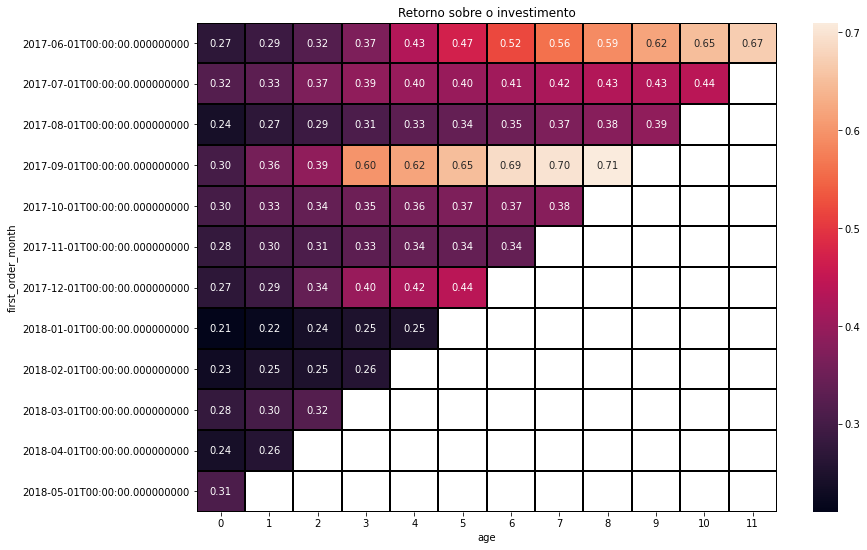

In [59]:
plt.figure(figsize=(13, 9))
plt.title('Retorno sobre o investimento')
sns.heatmap(output.cumsum(axis=1).round(2),
          annot=True,
          fmt='.2f',
          linewidths=1,
          linecolor='black')

O relatório evidencia que nenhuma das coortes cobriu suas despesas (< 1)

## Conclusão 


Iniciei importando as bibliotecas pandas e numpy e carregando as tabelas de visitas, pedidos e custos.

Em seguida, o pré processamento dos dados, onde:

**Tabela visits:**
- Substitui os nomes das colunas, que estavam com letras maiúsculas, por letras minúsculas;
- Mudei o tipo das colunas 'start_ts' e 'end_ts' para o tipo datetime;
- Mudei o tipo da coluna 'device' para o tipo category para otimizar o tamanho dos dados.

**Tabela orders:**
- Substitui os nomes das colunas, que estavam com letras maiúsculas, por letras minúsculas;
- Mudei o tipo da coluna 'buy_ts' para o tipo datetime.

**Tabela costs:**
- Mudei o tipo da coluna 'dt' para o tipo datetime.

A partir disso iniciei a análise do dados:
- **Como as pessoas usam o produto?** Em média, os usuários não realizam mais do que 1 sessão por dia e as sessões duram em média 643,5 segundos, equivalente a aproximadamente 11 minutos; a grande maioria dos usuários não fazem mais do que 1 compra por mês.
- **Quando elas começam a comprar?** O tempo entre o registro e a conversão dos usuários só aumentou a cada coorte que se passava (mês a mês), iniciando com os usuários virando clientes no mesmo dia (06/2017), até demorando mais de 1 mês para realizar sua primeira compra (06/2018).
- **Quanto dinheiro cada cliente traz para a empresa?** Em média cada cliente traz 0.57 para a empresa.
- **Quando as despesas serão cobertas?** Em média, ROI cresce de 2 em 2/ 3 em 3 centavos, se assim considerarmos o crescimento, as coortes demoraram em média 28 meses para cobrir suas despesas.

**Quais origens investir?**

Considerando que todos os ids possuem o mesmo investimento, ao analisar a origem das visitas, dos pedidos e a receita para cada:

Em relação às visitas e os pedidos, a maioria dos usuários que fazem compras provém da origem 1, 2 e 5, nessa ordem, que não são os ids que tem mais visitas, então seria interessante investir nessas origens, pois os usuários delas que fazem mais compras.

Essas origens também possuem a maior média de receita, estando o id 2 em primeiro lugar, o id 1 em segundo e o id 5 em quarto lugar. A origem 4 traz mais visitas, está em quarto em compras e tem a terceira maior receita, o que está proporcional.

A respeito das outras origens, já não compensa muito investir nelas.

- Também percebi que os usuários que compraram pela primeira vez entre 09/2017 e 12/2017, foram os que mais compraram, então se houve alguma condição especial de final de ano, deveriam se repetir mais vezes durante o ano, para trazer mais receita.